
# Data Visualization with Matplotlib - Exercises 2

จงทำตามคำสั่งต่อไปนี้ด้วย data ที่กำหนดให้ต่อไปนี้


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## อ่านไฟล์ Superstore.csv

In [5]:
df = pd.read_csv('Superstore.csv',encoding = 'iso-8859-1')

In [6]:
df.head()

,Order ID,Customer Name,Segment,Day,Month,Year,Ship Mode,City,State,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,Darrin Van Huff,Corporate,12,6,2016,Second Class,Los Angeles,California,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Segment        9994 non-null   object 
 3   Day            9994 non-null   int64  
 4   Month          9994 non-null   int64  
 5   Year           9994 non-null   int64  
 6   Ship Mode      9994 non-null   object 
 7   City           9994 non-null   object 
 8   State          9994 non-null   object 
 9   Category       9994 non-null   object 
 10  Sub-Category   9994 non-null   object 
 11  Product Name   9994 non-null   object 
 12  Sales          9994 non-null   float64
 13  Quantity       9994 non-null   int64  
 14  Discount       9994 non-null   float64
 15  Profit         9994 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 1.2+ MB


## Exercise 1

จงวาดกราฟแท่งแสดงรายได้ของปี 2014 - 2017 และตกแต่งให้สวยงาม


([<matplotlib.axis.XTick at 0x22cee1192d0>,
 [Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017')])

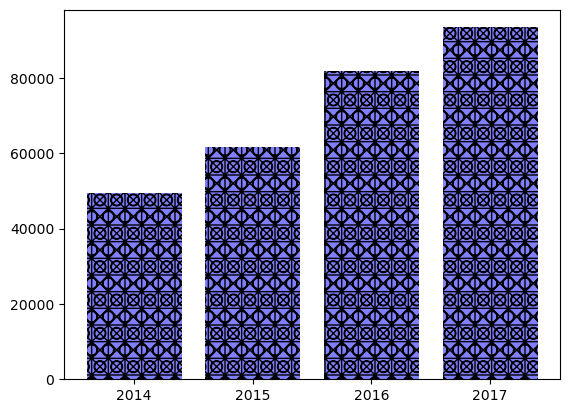

In [17]:
df1 = df.groupby('Year')['Profit'].sum()
x = df1.index
y = df1
plt.bar(x,y,color='b',alpha=0.5,hatch='xxO-|')
plt.xticks([2014,2015,2016,2017])

## Exercise 2

จงวาดกราฟแท่งแสดงรายได้ของปี 2014 - 2017 ในกราฟเดียวแยกตามหมวดหมู่ พร้อมตกแต่งให้สวยงาม

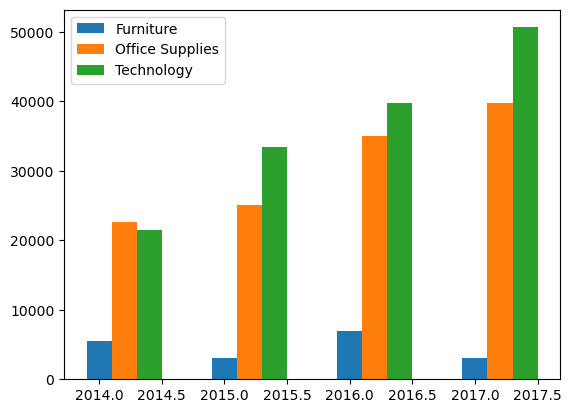

In [22]:
df['Category'].unique()
df[ df['Category'] == 'Furniture' ].groupby('Year').sum()['Profit']
arr_df = {}
for i in range(0,df['Category'].nunique()) :
    arr_df[df['Category'].unique()[i]] = df[ df['Category'] == df['Category'].unique()[i] ].groupby('Year').sum()['Profit']
    x = arr_df['Furniture'].index
y = arr_df['Furniture']
x1 = arr_df['Office Supplies'].index
y1 = arr_df['Office Supplies']
x2 = arr_df['Technology'].index
y2 = arr_df['Technology']
plt.bar(x,y,width=0.2,label='Furniture')
plt.bar(x1+0.2,y1,width=0.2,label='Office Supplies')
plt.bar(x2+2*0.2,y2,width=0.2,label='Technology')
plt.legend(loc='best')

## Exercise 3

จงวาดกราฟวงกลม แสดงเปอร์เซ็นต์การขนส่งแต่ละแบบ ( Ship Mode ) พร้อมตกแต่งให้สวยงาม

([<matplotlib.patches.Wedge at 0x22cf660f910>,
 [Text(-0.3324299954073045, 1.048565829194095, 'Second Class'),
  Text(-0.37942596150215924, -1.0324901644752662, 'Standard Class'),
  Text(0.7466110434072194, -0.8078192556892806, 'First Class'),
  Text(1.0849555427808886, -0.1813049094454643, 'Same Day')],
 [Text(-0.1813254520403479, 0.5719449977422335, '59.8%'),
  Text(-0.2069596153648141, -0.5631764533501451, '19.2%'),
  Text(0.4072423873130287, -0.4406286849214257, '15.7%'),
  Text(0.5917939324259391, -0.09889358697025323, '5.3%')])

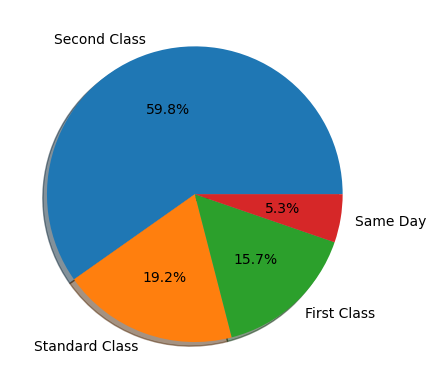

In [67]:
data = df.groupby('Order ID')['Ship Mode'].unique().value_counts()
lb = df['Ship Mode'].unique()

plt.pie(data,labels=lb,shadow=True,autopct='%1.1f%%')

## Exercise 4

จงวาดกราฟความถี่ แสดงจำนวนการขนส่งแต่ละแบบ ( Ship Mode ) พร้อมตกแต่งให้สวยงาม

(array([2994.,    0.,    0.,  964.,    0.,    0.,  787.,    0.,    0.,
         264.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

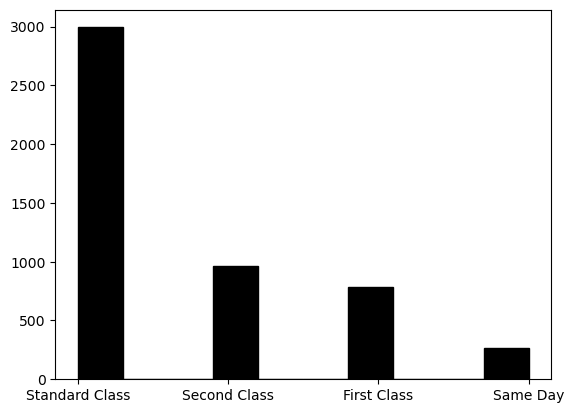

In [63]:
orderIdShipMode = pd.DataFrame({"Order ID":df["Order ID"],"Ship Mode":df["Ship Mode"]})

collapsed_df = orderIdShipMode.groupby("Order ID").first().reset_index()

plt.hist(collapsed_df["Ship Mode"],ec='k',color='k')

## Exercise 5

จงวาดกราฟจุด(Scatter) แสดงราคาขายกับกำไรที่ได้ (Sales , Profit) พร้อมตกแต่งให้สวยงาม

In [55]:
sales = df['Sales']
profit = df['Profit']

Text(0, 0.5, 'profit')

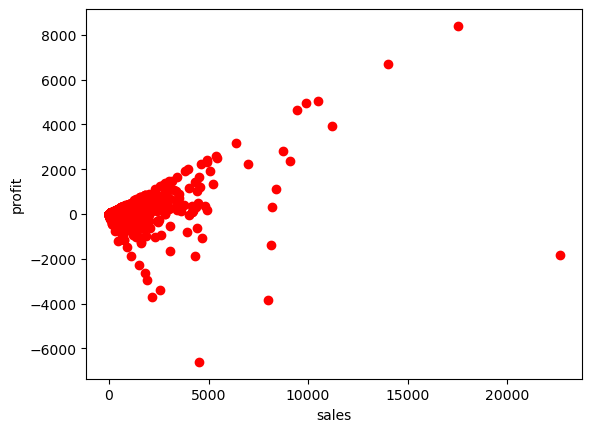

In [58]:
ax = plt.axes()
ax.scatter(x=sales,y=profit,color='r')
ax.set_xlabel('sales')
ax.set_ylabel('profit')